In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv('AirPassengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
#Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True) 

In [23]:
df.isnull().sum()

Passengers    0
dtype: int64

In [24]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


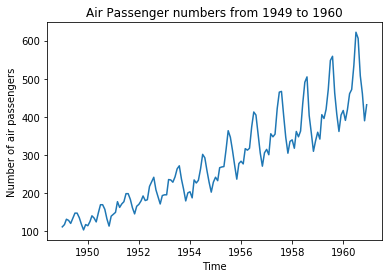

In [25]:
## plot graph
plt.title('Air Passenger numbers from 1949 to 1960')
plt.xlabel('Time')
plt.ylabel('Number of air passengers')
plt.plot(df.Passengers)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='Passengers',data=df,ax=ax)
plt.show()

In [4]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [7]:
##convert from string to datetime
df = df.set_index(['Month'])
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


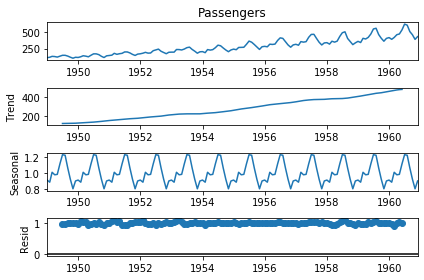

In [26]:
result = seasonal_decompose(df['Passengers'], model ='multiplicative')
r =result.plot() 

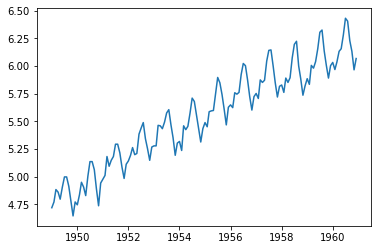

In [27]:
# Trying logScale
logdf = np.log(df)
plt.plot(logdf)

In [ ]:
# Log Scale - Significatnt (0.022)

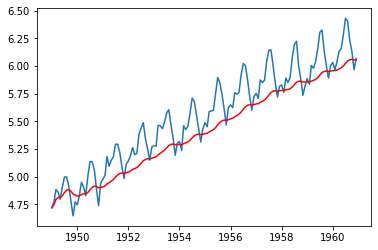

In [28]:
##Transforming with exponential decay####
expdecay = logdf.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(logdf)
plt.plot(expdecay, color='red')

In [29]:
detrendexp = logdf - expdecay

result = adfuller(detrendexp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.601262
p-value: 0.005737
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


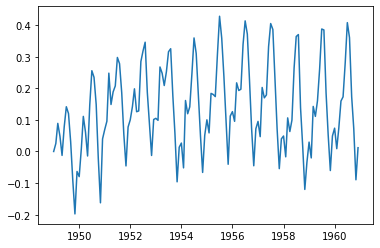

In [30]:
plt.plot(detrendexp)

In [ ]:
##Time shift transformation###
datadiff = logdf - logdf.shift()
plt.plot(datadiff)

In [ ]:
datadiff.dropna(inplace=True)

In [ ]:
result = adfuller(datadiff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
# Not Stationary

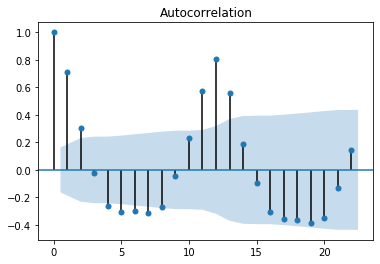

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(detrendexp)

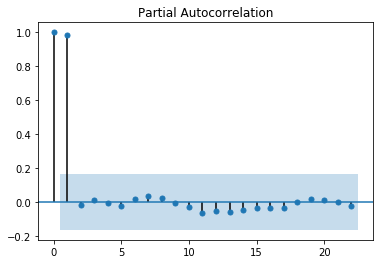

In [32]:
pacf = plot_pacf(expdecay)

In [15]:
#AR Model
#making order=(1,1,0) gives RSS=1.6736
model = ARIMA(expdecay, order=(1,1,0))
results_AR = model.fit(disp=-1)

C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 495.549
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 23 Sep 2020   AIC                           -985.098
Time:                        10:24:43   BIC                           -976.210
Sample:                    02-01-1949   HQIC                          -981.486
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0095      0.002      5.225      0.000       0.006       0.013
ar.L1.D.Passengers     0.6563      0.064     10.303      0.000       0.531       0.781
                    

In [17]:
#MA Model
model = ARIMA(expdecay, order=(0,1,2))
results_MA = model.fit(disp=-1)

C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [18]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 507.817
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 23 Sep 2020   AIC                          -1007.635
Time:                        10:24:54   BIC                           -995.783
Sample:                    02-01-1949   HQIC                         -1002.819
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0093      0.001      7.379      0.000       0.007       0.012
ma.L1.D.Passengers     0.9476      0.076     12.423      0.000       0.798       1.097
ma.L2.D.Passengers  

In [39]:
model = ARIMA(expdecay, order=(1, 1, 1))  
results_ARIMA111 = model.fit(disp=-1)  

C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
print(results_ARIMA111.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 508.465
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 23 Sep 2020   AIC                          -1008.929
Time:                        10:31:23   BIC                           -997.078
Sample:                    02-01-1949   HQIC                         -1004.113
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0093      0.001      6.573      0.000       0.007       0.012
ar.L1.D.Passengers     0.3451      0.101      3.422      0.001       0.147       0.543
ma.L1.D.Passengers  

In [47]:
model = ARIMA(expdecay, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)

C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kimaya pc\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 514.659
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 23 Sep 2020   AIC                          -1017.319
Time:                        10:38:29   BIC                           -999.542
Sample:                    02-01-1949   HQIC                         -1010.095
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0095      0.000     62.558      0.000       0.009       0.010
ar.L1.D.Passengers     1.3241      0.099     13.309      0.000       1.129       1.519
ar.L2.D.Passengers  

In [ ]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(logdf, start_p=0, start_d=1, start_q=0, 
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series           
                      d=1,       # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

In [ ]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(logdf, start_p=0, start_d=1, start_q=0, 
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=1, max_q=2, # maximum p and q
                      m=1,              # frequency of series           
                      d=1,       # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

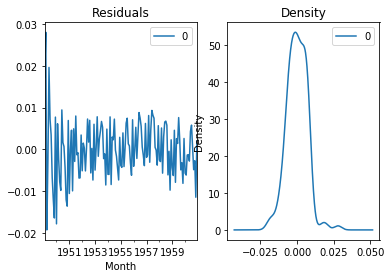

In [49]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

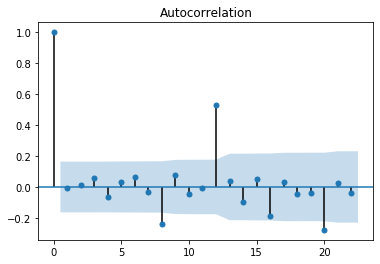

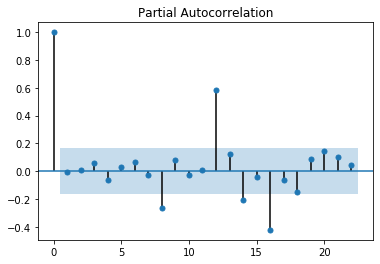

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(residuals)
pacf =  plot_pacf(residuals)

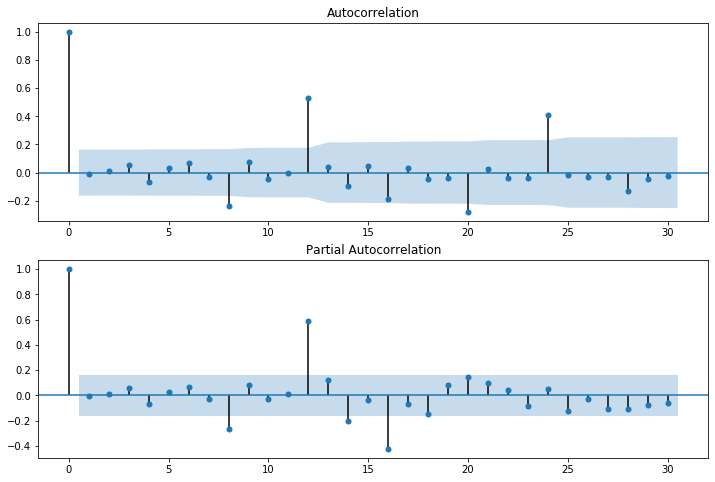

In [52]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax2)

In [53]:
sm.stats.durbin_watson(results_ARIMA.resid.values)

1.9695128102718267

In [55]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#LJung Box Test
acorr_ljungbox(residuals, lags = 6)

(array([0.0088431 , 0.02266608, 0.46824118, 1.07445236, 1.21116138,
        1.83930431]),
 array([0.92507918, 0.98873094, 0.92581119, 0.89830415, 0.94380211,
        0.93386847]))